# Modélisation et estimation de la variable de toxicité

# Base de données initiale

In [55]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

#lecture du fichier Excel
data = pd.read_csv ('challenge_youtube_toxic.csv',sep=";", encoding = "ISO-8859-1")

#suppression des colonnes inutiles
dftox= data.drop(['video_id_court','video_id', 'channel_id'], axis=1)

#obtention de la base de donnée initiale
dftox

,nbrMot,nbrMotInsulte,nbrMotAllong,nbrMotMAJ,nbrExclMark,nbrQuestMark,nbrMotMoyenne,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,...,message_count,discussion_count,distinct_authors_count,authors_3channels_count,liked_authors_count,channel_name,subscriberCount,viewCount,categorie_new,categ_inst
0,3813,18,4,145,79,60,30.261900,0.142857,0.031746,1.150794,...,126,28,58,47,23,LeHuffPost,339922,225393312,Core,Pure Players
1,28,2,0,1,0,0,9.333333,0.666667,0.000000,0.333333,...,3,0,3,1,0,CNEWS,189971,132125693,Core,TV
2,3804,68,9,56,75,54,27.565220,0.492754,0.065217,0.405797,...,138,22,83,49,36,LeHuffPost,339922,225393312,Core,Pure Players
3,4,0,1,2,0,0,2.000000,0.000000,0.500000,1.000000,...,2,0,2,0,0,Telegramme,2862,2481100,Niche,Presse_regionale
4,737,3,1,18,5,6,32.043478,0.130435,0.043478,0.782609,...,23,4,18,7,7,Les Echos,30010,6710737,Core,Presse nationale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,16,0,0,0,3,0,5.333333,0.000000,0.000000,0.000000,...,3,0,3,1,0,Le Parisien,149018,85536183,Core,Presse_regionale
46098,228,1,1,0,0,1,228.000000,1.000000,1.000000,0.000000,...,1,0,1,0,0,Le Monde,568615,134570352,Core,Presse nationale
46099,287,2,0,3,2,0,35.875000,0.250000,0.000000,0.375000,...,8,0,7,5,3,CNEWS,189971,132125693,Core,TV
46100,176,0,0,0,6,3,58.666670,0.000000,0.000000,0.000000,...,3,1,3,0,1,Le Figaro,180173,140135417,Core,Presse nationale


# Création de la base de données spécifique à la variable toxicité (justification du choix des variables voir rapport)

In [56]:
#Remplacement des 0 par des 1 dans la colonne 'nbrMot' car division par cette variable, sinon valeur impossible
#Aucun impact sur le résultat car la ponctuation n'est pas comptée comme un mot
dftox['nbrMot'][dftox['nbrMot'] ==0] = 1

#Création des variables 'nbrMotInsulte/nbrMot', 'nbrMotAllong/nbrMot', ... 
dftox['nbrMotInsulte/nbrMot']=dftox['nbrMotInsulte']/dftox['nbrMot']
dftox['nbrMotAllong/nbrMot']=dftox['nbrMotAllong']/dftox['nbrMot']
dftox['nbrMotMAJ/nbrMot']=dftox['nbrMotMAJ']/dftox['nbrMot']
dftox['nbrExclMark/nbrMot']=dftox['nbrExclMark']/dftox['nbrMot']
dftox['nbrQuestMark/nbrMot']=dftox['nbrQuestMark']/dftox['nbrMot']

#Suppression des colonnes inutiles pour la variable toxicité
dftox=dftox.drop(['nbrMotMoyenne','nbrMot','nbrMotInsulte','nbrMotAllong','nbrMotMAJ','nbrExclMark','nbrQuestMark'] ,axis=1)

<ipython-input-56-f471ebcffca3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftox['nbrMot'][dftox['nbrMot'] ==0] = 1


In [57]:
#Remplacement des 0 par des 1 dans la colonne 'message_count' car division par cette variable, sinon valeur impossible
dftox['message_count'][dftox['message_count'] ==0] = 1

#Création des variables 'comment_count/message_count' et 'discussion_count/message_count'
dftox['comment_count/message_count']=dftox['comment_count']/dftox['message_count']
dftox['discussion_count/message_count']=dftox['discussion_count']/dftox['message_count']

#Suppression des colonnes à présent inutiles
dftox=dftox.drop(['message_count','comment_count','discussion_count','thread_count'],axis=1)

<ipython-input-57-beea89293ef5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftox['message_count'][dftox['message_count'] ==0] = 1


In [58]:
#Suppression de variables
dftox=dftox.drop(['distinct_authors_count','authors_3channels_count','liked_authors_count'],axis=1)

In [59]:
#Remplacement des 0 par des 1 dans la colonne 'message_count' car division par cette variable, sinon valeur impossible
dftox['subscriberCount'][dftox['subscriberCount'] ==0] = 1

#Création de la variable 'viewCount/subscriberCount'
dftox['viewCount/subscriberCount']=dftox['viewCount']/dftox['subscriberCount']

#Suppression des colonnes 'subscriberCount' et 'viewCount' inutiles à présent
dftox=dftox.drop(['subscriberCount','viewCount'],axis=1)

<ipython-input-59-f6f76154818c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftox['subscriberCount'][dftox['subscriberCount'] ==0] = 1


In [60]:
#suppression des variables catégorie
dftox=dftox.drop(['channel_name','categorie_new','categ_inst'],axis=1)

In [61]:
#vérification des types de la base de données
dftox.dtypes

nbrMotInsulteMoyenne              float64
nbrMotAllongMoyenne               float64
nbrMotMAJMoyenne                  float64
nbrExclMarkMoyenne                float64
nbrQuestMarkMoyenne               float64
nbrMotInsulte/nbrMot              float64
nbrMotAllong/nbrMot               float64
nbrMotMAJ/nbrMot                  float64
nbrExclMark/nbrMot                float64
nbrQuestMark/nbrMot               float64
comment_count/message_count       float64
discussion_count/message_count    float64
viewCount/subscriberCount         float64
dtype: object

# Détermination du score de toxicité

In [62]:
dftox2=dftox.copy()

# Détail de la variable 'viewCount/subscriberCount'

In [63]:
#Nous pouvons voir les informations relatives à cette variable, notamment le min et le max qui nous interessent
print(dftox['viewCount/subscriberCount'].describe())

count    4.610200e+04
mean     6.482884e+03
std      9.400239e+04
min      2.651953e+01
25%      3.131487e+02
50%      6.630736e+02
75%      6.955045e+02
max      1.713234e+06
Name: viewCount/subscriberCount, dtype: float64


In [64]:
#Nous déterminons les frontières de chacune de nos tranches
#omme il y'a 3 tranches, il y'a 2 frontières une à 1/3, l'autre à 2/3, que l'on calcule comme ça: 

print('tranche 1: ',(dftox['viewCount/subscriberCount'].max()-dftox['viewCount/subscriberCount'].min())/3)
print('tranche 2: ',(dftox['viewCount/subscriberCount'].max()-dftox['viewCount/subscriberCount'].min())*(2/3))

tranche 1:  571069.1601554907
tranche 2:  1142138.3203109815


In [65]:
#Nous créeons une fonction qui attribura à la variable la valeur 1, 2 ou 3 en fonction de sa valeur et donc de son appartenance aux tranches 1, 2 ou 3

def f(x):
    if x<=5.7107*10**5:
        return(1)
    elif x<=1.1421*10**6:
        return(2)
    else: return(3)

#On applique cette fonction à l'ensemble des valeurs de la variable 'viewCount/subscriberCount'
dftox['viewCount/subscriberCount']=dftox['viewCount/subscriberCount'].apply(lambda x: f(x))

In [66]:
#Verification de la bonne modification
print(dftox['viewCount/subscriberCount'])
print(dftox['viewCount/subscriberCount'].describe())


0        1
1        1
2        1
3        1
4        1
        ..
46097    1
46098    1
46099    1
46100    1
46101    1
Name: viewCount/subscriberCount, Length: 46102, dtype: int64
count    46102.000000
mean         1.006269
std          0.103221
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: viewCount/subscriberCount, dtype: float64


# On effectue le même processus pour l'ensemble des variables de la dataframe dftox (on ne détaillera pas les calculs vérifiés à la main)

In [67]:
def f(x):
    if x<=54:
        return(1)
    elif x<=108:
        return(2)
    else: return(3)
dftox['nbrMotMAJMoyenne']=dftox['nbrMotMAJMoyenne'].apply(lambda x: f(x))

In [68]:
def f(x):
    if x<=9.33:
        return(1)
    elif x<=18.66:
        return(2)
    else: return(3)
dftox['nbrMotAllongMoyenne']=dftox['nbrMotAllongMoyenne'].apply(lambda x: f(x))

In [69]:
def f(x):
    if x<=4.66:
        return(1)
    elif x<=9.33:
        return(2)
    else: return(3)
dftox['nbrMotInsulteMoyenne']=dftox['nbrMotInsulteMoyenne'].apply(lambda x: f(x))

In [70]:
def f(x):
    if x<=34.66:
        return(1)
    elif x<=69.33:
        return(2)
    else: return(3)
dftox['nbrExclMarkMoyenne']=dftox['nbrExclMarkMoyenne'].apply(lambda x: f(x))

In [71]:
def f(x):
    if x<=40.25:
        return(1)
    elif x<=80.5:
        return(2)
    else: return(3)
dftox['nbrQuestMarkMoyenne']=dftox['nbrQuestMarkMoyenne'].apply(lambda x: f(x))

In [72]:
def f(x):
    if x<=0.4:
        return(1)
    elif x<=0.8:
        return(2)
    else: return(3)
dftox['nbrMotInsulte/nbrMot']=dftox['nbrMotInsulte/nbrMot'].apply(lambda x: f(x))

In [73]:
def f(x):
    if x<=0.33:
        return(1)
    elif x<=0.66:
        return(2)
    else: return(3)
dftox['nbrMotAllong/nbrMot']=dftox['nbrMotAllong/nbrMot'].apply(lambda x: f(x))

In [74]:
def f(x):
    if x<=0.34:
        return(1)
    elif x<=0.68:
        return(2)
    else: return(3)
dftox['nbrMotMAJ/nbrMot']=dftox['nbrMotMAJ/nbrMot'].apply(lambda x: f(x))

In [75]:
def f(x):
    if x<=7.5:
        return(1)
    elif x<=15:
        return(2)
    else: return(3)
dftox['nbrExclMark/nbrMot']=dftox['nbrExclMark/nbrMot'].apply(lambda x: f(x))

In [76]:
def f(x):
    if x<=6.66:
        return(1)
    elif x<=13.33:
        return(2)
    else: return(3)
dftox['nbrQuestMark/nbrMot']=dftox['nbrQuestMark/nbrMot'].apply(lambda x: f(x))

In [77]:
def f(x):
    if x<=0.32:
        return(1)
    elif x<=0.64:
        return(2)
    else: return(3)
dftox['comment_count/message_count']=dftox['comment_count/message_count'].apply(lambda x: f(x))

In [78]:
def f(x):
    if x<=0.16:
        return(1)
    elif x<=0.34:
        return(2)
    else: return(3)
dftox['discussion_count/message_count']=dftox['discussion_count/message_count'].apply(lambda x: f(x))

In [79]:
#On obtient la dataframe suivante 
dftox

,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,nbrMotInsulte/nbrMot,nbrMotAllong/nbrMot,nbrMotMAJ/nbrMot,nbrExclMark/nbrMot,nbrQuestMark/nbrMot,comment_count/message_count,discussion_count/message_count,viewCount/subscriberCount
0,1,1,1,1,1,1,1,1,1,1,3,2,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,2,1,1
3,1,1,1,1,1,1,1,2,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,1,1,1,1,1,1,1,1,1,1,1,1,1
46098,1,1,1,1,1,1,1,1,1,1,1,1,1
46099,1,1,1,1,1,1,1,1,1,1,1,1,1
46100,1,1,1,1,1,1,1,1,1,1,2,2,1


In [80]:
#On vérifie que l'ensemble des élements de la dataframe a bien été convertie
dftox.dtypes

nbrMotInsulteMoyenne              int64
nbrMotAllongMoyenne               int64
nbrMotMAJMoyenne                  int64
nbrExclMarkMoyenne                int64
nbrQuestMarkMoyenne               int64
nbrMotInsulte/nbrMot              int64
nbrMotAllong/nbrMot               int64
nbrMotMAJ/nbrMot                  int64
nbrExclMark/nbrMot                int64
nbrQuestMark/nbrMot               int64
comment_count/message_count       int64
discussion_count/message_count    int64
viewCount/subscriberCount         int64
dtype: object

# Création du score de toxicité

In [81]:
dftox['score']=(dftox['nbrMotInsulte/nbrMot']+dftox['nbrMotInsulteMoyenne'])*5+(dftox['comment_count/message_count']+dftox['discussion_count/message_count']+dftox['nbrMotMAJ/nbrMot'])*4 + (dftox['viewCount/subscriberCount']+dftox['nbrMotMAJMoyenne'])*3 +(dftox['nbrMotAllongMoyenne']+ dftox['nbrExclMarkMoyenne'] + dftox['nbrMotAllong/nbrMot']+ dftox['nbrExclMark/nbrMot'])*2 + (dftox['nbrQuestMark/nbrMot']+dftox['nbrQuestMarkMoyenne'])


In [82]:
#Description de la variable score
dftox['score'].describe()

count    46102.000000
mean        40.789076
std          3.812727
min         38.000000
25%         38.000000
50%         38.000000
75%         42.000000
max         60.000000
Name: score, dtype: float64

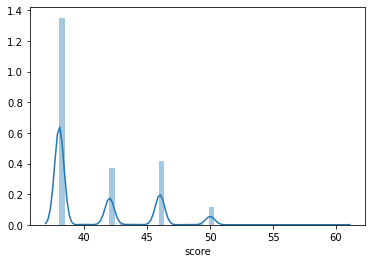

In [83]:
#Distribution de la variable score
sns.distplot(dftox['score'])

# Création de la variable toxicité

In [84]:
#création de la fonction permettant d'affecter une vidéo à son bon degré de toxicité en fonction de son score de toxicité
def f(x):
    if x<=40:
        return('peu toxique')
    elif x<=44:
        return('assez toxique')
    elif x<=48:
        return('toxique')
    else: return('très toxique')
    
#création de la variable toxique dans la dataframe dftox en appliquant la fonction précédant à la colonne 'score'
dftox['toxic'] = dftox['score'].apply(lambda x: f(x))

In [85]:
#répartition du nombre de vidéo dans chaque catégorie qualifiant la toxicité
dftox['toxic'].value_counts()

peu toxique      27507
toxique           8470
assez toxique     7674
très toxique      2451
Name: toxic, dtype: int64

# Création de la dataframe utilisée pour les modèles de machine learning

In [86]:
dftox2['toxic']=dftox['toxic']
dftox2

,nbrMotInsulteMoyenne,nbrMotAllongMoyenne,nbrMotMAJMoyenne,nbrExclMarkMoyenne,nbrQuestMarkMoyenne,nbrMotInsulte/nbrMot,nbrMotAllong/nbrMot,nbrMotMAJ/nbrMot,nbrExclMark/nbrMot,nbrQuestMark/nbrMot,comment_count/message_count,discussion_count/message_count,viewCount/subscriberCount,toxic
0,0.142857,0.031746,1.150794,0.626984,0.476190,0.004721,0.001049,0.038028,0.020719,0.015736,0.642857,0.222222,663.073623,très toxique
1,0.666667,0.000000,0.333333,0.000000,0.000000,0.071429,0.000000,0.035714,0.000000,0.000000,0.000000,0.000000,695.504540,peu toxique
2,0.492754,0.065217,0.405797,0.543478,0.391304,0.017876,0.002366,0.014721,0.019716,0.014196,0.623188,0.159420,663.073623,assez toxique
3,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,866.911251,assez toxique
4,0.130435,0.043478,0.782609,0.217391,0.260870,0.004071,0.001357,0.024423,0.006784,0.008141,0.260870,0.173913,223.616694,assez toxique
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46097,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.187500,0.000000,0.000000,0.000000,573.999000,peu toxique
46098,1.000000,1.000000,0.000000,0.000000,1.000000,0.004386,0.004386,0.000000,0.000000,0.004386,0.000000,0.000000,236.663387,peu toxique
46099,0.250000,0.000000,0.375000,0.250000,0.000000,0.006969,0.000000,0.010453,0.006969,0.000000,0.000000,0.000000,695.504540,peu toxique
46100,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.034091,0.017045,0.333333,0.333333,777.782559,toxique


# Création du Train_test et Train_set

In [87]:
#on sépare la dataframe dftox2 en deux dataframe, une train_set et une test_test (80%/20%)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dftox2, test_size = 0.2, random_state = 1)

In [88]:
#On prépare la fonction qui permet de déterminer les features X de la variable target y
def preprocessing(dftox2):
    
    X = dftox2.drop(['toxic'], axis=1)
    y = dftox2['toxic']
    
    print(X.shape, y.shape)
    return X,y

In [89]:
#on applique la fonction précédente au train_set et au test_set afin d'avoir pour l'entrainement et le test des features et les variables target
X_train, y_train = preprocessing(train_set) 
X_test, y_test = preprocessing(test_set) 

(36881, 13) (36881,)
(9221, 13) (9221,)


# Test des différents modèles de classification

In [ ]:
#import des différents modèles
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
#import des outils d'analyse des modèles
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve

In [96]:
#établissement des modèles
model_a = DecisionTreeClassifier(random_state=0)
model_b = KNeighborsClassifier(n_neighbors=2)
model_c = SVC()
model_d = RandomForestClassifier()
model_e = LogisticRegression()
model_f = GradientBoostingClassifier()

In [97]:
#création d'un dictionnaire de modèle
dict_of_models = {'DecisionTree': model_a,
                 'KNeighbors': model_b,
                 'SVM': model_c, 
                 'RandomForest': model_d, 
                 'LogisticRegression': model_e,
                 'GradientBoosting' : model_f}

In [98]:
#On entraîne tous les modèles et on affiche leurs scores
for name, model in dict_of_models.items():
    
    model.fit(X_train,y_train)
    print(name)
    print(model.score(X_test, y_test))

DecisionTree
0.999566207569678
KNeighbors
0.7795249972887973
SVM
0.601236308426418
RandomForest
0.9962043162346818
LogisticRegression
0.1642988829844919
GradientBoosting
0.9976141416332285


# Approfondissement de Decision Tree, Random Forest et Gradient Boosting

DecisionTree
0.999566207569678
RandomForest
0.9964212124498427
GradientBoosting
0.9977225897408091


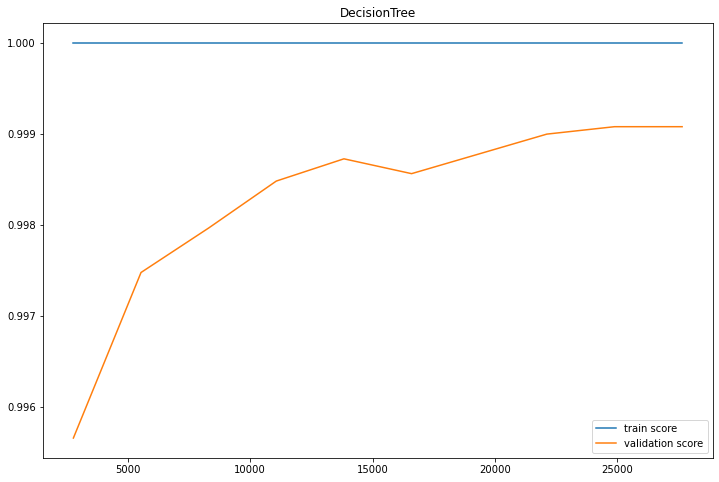

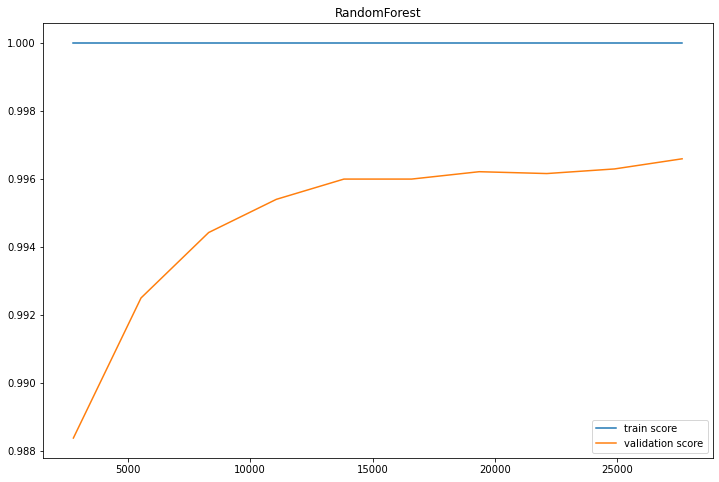

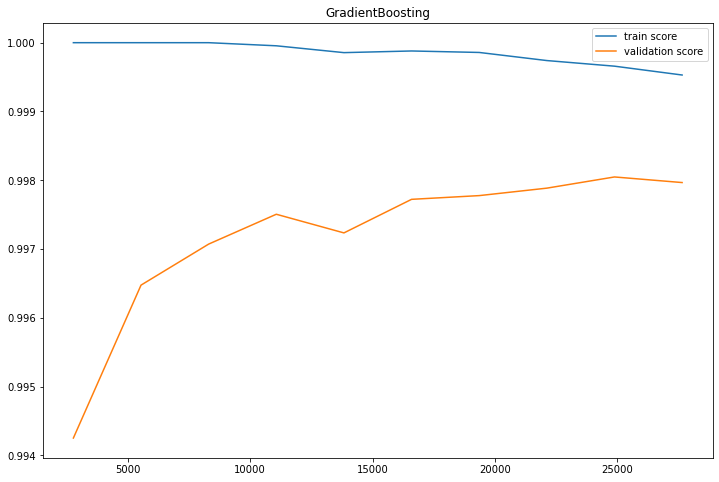

In [99]:
#nouveau dictionnaire de modèle
dict_of_models_performant = {'DecisionTree': model_a,
                 'RandomForest': model_d, 
                 'GradientBoosting' : model_f}

#on teste à nouveau les modèles afin d'obtenir les scores
for name, model in dict_of_models_performant.items():
    
    model.fit(X_train,y_train)
    print(name)
    print(model.score(X_test, y_test))
    
    #on affiche les courbes d'entrainement et de validation
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                          cv=4, train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.title(name)

# Amélioration du Gradient Boosting

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures , StandardScaler

In [102]:
model = make_pipeline(PolynomialFeatures(),
                     StandardScaler(),
                     GradientBoostingClassifier())

In [103]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [104]:
hyper_parameters = {'polynomialfeatures__degree' : [2,3],
                    'gradientboostingclassifier__learning_rate': [0.01,0.03,0.04],
                 'gradientboostingclassifier__subsample': [0.1,0.2,0.3],
                  'gradientboostingclassifier__n_estimators': [50],
                  'gradientboostingclassifier__max_depth': [6,7,8]
                 }

In [105]:
grid = RandomizedSearchCV(model,hyper_parameters, cv=2, n_iter=10)

In [106]:
grid.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures()),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingclassifier',
                                              GradientBoostingClassifier())]),
                   param_distributions={'gradientboostingclassifier__learning_rate': [0.01,
                                                                                      0.03,
                                                                                      0.04],
                                        'gradientboostingclassifier__max_depth': [6,
                                                                                  7,
                                                                                  8],
                     

In [107]:
grid.best_params_

{'polynomialfeatures__degree': 2,
 'gradientboostingclassifier__subsample': 0.3,
 'gradientboostingclassifier__n_estimators': 50,
 'gradientboostingclassifier__max_depth': 8,
 'gradientboostingclassifier__learning_rate': 0.03}

In [108]:
grid.score(X_test, y_test)

0.9973972454180674

In [ ]:
N, train_score, val_score = learning_curve(grid, X_train, y_train,
                                          cv=4, train_sizes=np.linspace(0.1,1,10))
    
plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()